### Created by: Anthony D. Cho
### Last update: 12.11.2021

**Subject**: Classification (Naive bayes) - Applied to Breast Cancer Coimbra


In [1]:
import warnings
warnings.filterwarnings('ignore')

from numpy import where, array, linspace
from pandas import read_csv, DataFrame, concat, get_dummies
import matplotlib.pyplot as plt

%matplotlib inline

## Encoding function
from sklearn.preprocessing import StandardScaler, LabelBinarizer # dummy Encoding


from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

## Model
from sklearn.naive_bayes import GaussianNB

## Metrics
from sklearn.metrics import classification_report, plot_confusion_matrix

### Naive bayes computation 

Consider the following table

|     Instance  | 1 | 2 | 3 | 4 | 5 | 6 |
|--------------:|--:|--:|--:|--:|--:|--:|
|         $a_1$ | T | T | T | F | F | F |
|         $a_2$ | T | T | F | F | T | T |
|         $a_3$ | T | T | F | F | F | T |
|         Class | + | + | - | + | - | - |

The naive-bayes' equation is given by:

$$\begin{eqnarray*}
			\mathbb{P}(\text{Class} | a_1, a_2, a_3)
            &\propto & \;\; \mathbb{P}(a_1|\text{Class}) \\
			&		& \cdot \; \mathbb{P}(a_2|\text{Class}) \\
			&		& \cdot \; \mathbb{P}(a_3|\text{Class}) \\
			&		& \cdot \; \mathbb{P}(\text{Class})
		\end{eqnarray*}$$
        

**P(Class)**
        
| Class            | +   | -   |
|------------------|-----|-----|
| P(Class)         | 3/6 | 3/6 |


**P($a_3$|Class)**

| Class       | +   | -   |
|-------------|-----|-----|
| P(T\|Class) | 2/3 | 1/3 |
| P(F\|Class) | 1/3 | 2/3 |

**P($a_2$|Class)**

| Class       | +   | -   |
|---------------------|-----|-----|
| P(T\|Class) | 2/3 | 2/3 |
| P(F\|Class) | 1/3 | 1/3 |

**P($a_1$|Class)**

| Class       | +   | -   |
|---------------------|-----|-----|
| P(T\|Class) | 2/3 | 1/3 |
| P(F\|Class) | 1/3 | 2/3 |


#### Classify test input: [T, F, T]

$$
\begin{eqnarray*}
			\mathbb{P}\left(\text{Class} = + \left| \begin{array}{l}
				a_1=T \\
				a_2=F \\
				a_3 = T
			\end{array} \right. \right)&\propto & \frac{2}{3} \frac{1}{3} \frac{2}{3} \frac{3}{6} \approx 0.0741
		\end{eqnarray*}
$$

$$
\begin{eqnarray*}
			\mathbb{P}\left(\text{Class} = - \left| \begin{array}{l}
				a_1=T \\
				a_2=F \\
				a_3 = T
		\end{array} \right. \right)&\propto & \frac{1}{3} \frac{1}{3} \frac{1}{3} \frac{3}{6} \approx 0.0185
		\end{eqnarray*}
$$

Therefore, it is classified as +.

In [2]:
## Predictor set
X = array([['T', 'T', 'T'], 
           ['T', 'T', 'T'], 
           ['T', 'F', 'F'], 
           ['F', 'F', 'F'], 
           ['F', 'T', 'F'],
           ['F', 'T', 'T']
          ])

## Target set
y = array(['+', '+', '-', '+', '-', '-'])

## Labels
Values = ['F', 'T']
Target = ['-', '+']

In [3]:
## Encoding predictor and target
X = where(X=='F', 0, 1)
y = where(y=='-', 0, 1)

In [4]:
## Model instance and fitting
model = GaussianNB().fit(X, y)

In [5]:
## Compute test
test = array([['T', 'F', 'T']])

## Encoding test data
test_Cod = where(test=='F', 0, 1)

## Compute prediction
predict = model.predict(test_Cod)

## Display decoded prediction
print('{} se clasifica como: {}'.format(test[0], Target[predict[0]]))

['T' 'F' 'T'] se clasifica como: +


### Problem: Play game

In [6]:
## Data
data = {'outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny',
                    'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
        'temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 
                        'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 
                     'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'], 
        'wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 
                 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
        'PlayGame': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 
                     'Yes', 'Yes', 'Yes', 'Yes', 'No']
       }

## Convert into a dataframe
data = DataFrame(data)
data

,outlook,temperature,humidity,wind,PlayGame
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
## One-hot encoding by get dummies from pandas (just for illustration)
get_dummies(data, drop_first=True)

,outlook_Rain,outlook_Sunny,temperature_Hot,temperature_Mild,humidity_Normal,wind_Weak,PlayGame_Yes
0,0,1,1,0,0,1,0
1,0,1,1,0,0,0,0
2,0,0,1,0,0,1,1
3,1,0,0,1,0,1,1
4,1,0,0,0,1,1,1
5,1,0,0,0,1,0,0
6,0,0,0,0,1,0,1
7,0,1,0,1,0,1,0
8,0,1,0,0,1,1,1
9,1,0,0,1,1,1,1


In [8]:
## Encoder instances
OHEncondings = {} 
for label in data.columns:
    OHEncondings[label] = LabelBinarizer().fit(data[label])

## Make a copy of data to be used for encoding
data_Cod = data.copy()

## Apply encoding
for label in OHEncondings:
    
    ## Encodign by column
    encoding = OHEncondings[label]
    
    if encoding.y_type_ == 'binary':
        
        ## Apply binary encoding
        colname = ['{}_{}'.format(label, encoding.classes_[-1])]
        temp = encoding.transform(data[label])
    else:
        
        ## Apply multi-class encoding
        colname = ['{}_{}'.format(label, encoding.classes_[k]) for k in range(len(encoding.classes_))]
        temp = encoding.transform(data[label])
    
    ## Convert encoded column into dataframe
    temp = DataFrame(data=temp, columns=colname)
    
    ## Include enconded column into dataset
    for col in temp.columns:
        data_Cod[col] = temp[col]

## Drop categorical columns
data_Cod.drop(columns=data.columns, inplace=True)


In [9]:
## Display encoded dataset 
data_Cod

,outlook_Overcast,outlook_Rain,outlook_Sunny,temperature_Cool,temperature_Hot,temperature_Mild,humidity_Normal,wind_Weak,PlayGame_Yes
0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,0,0,0
2,1,0,0,0,1,0,0,1,1
3,0,1,0,0,0,1,0,1,1
4,0,1,0,1,0,0,1,1,1
5,0,1,0,1,0,0,1,0,0
6,1,0,0,1,0,0,1,0,1
7,0,0,1,0,0,1,0,1,0
8,0,0,1,1,0,0,1,1,1
9,0,1,0,0,0,1,1,1,1


In [10]:
## Target labels
label = OHEncondings['PlayGame'].classes_

## Predictors and target data
X = data_Cod.drop(columns=['PlayGame_Yes'])
y = data_Cod['PlayGame_Yes']

## Partition set
N = len(X)//2
X_train, X_test = X[:N], X[N:]
y_train, y_test = y[:N], y[N:]

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.75      0.60      0.67         5

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



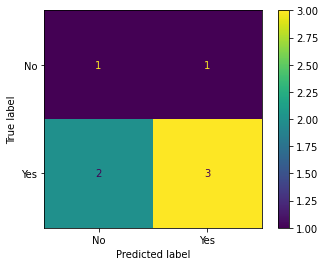

In [11]:
## Model instance and fitting
model = GaussianNB().fit(X_train, y_train)

## Compute prediction using test set
prediction = model.predict(X_test)

## Display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, display_labels=label)
plt.show()

# Problem: Breast Cancer Coimbra

**Target**: Classification (0: No, 1: Yes)

## Data loading

Source: [Breast Cancer Coimbra](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [12]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

## Feature names list
feature_names = data.columns[:-1]

In [13]:
data.head(4)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1


## Data pre-processing

In [14]:
## Predictors and target assignment
X = data.drop(columns=['Classification'])
y = data['Classification']

## Partition sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20200803)

## Standardizing
scale = StandardScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

## Display data shape
print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (87, 9), y: (87,)
(test shape) X: (29, 9), y: (29,)


              precision    recall  f1-score   support

           1       0.61      0.92      0.73        12
           2       0.91      0.59      0.71        17

    accuracy                           0.72        29
   macro avg       0.76      0.75      0.72        29
weighted avg       0.79      0.72      0.72        29



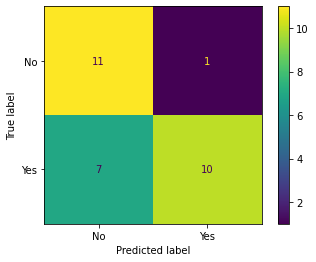

In [15]:
## Model instance and fitting
model = GaussianNB().fit(X_train, y_train)

## Compute prediction using test set
prediction = model.predict(X_test)

## Display classification report
print(classification_report(y_pred=prediction, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, display_labels=label)
plt.show()

## Searching best hyper-parameter value

In [16]:
## Cross-Validation's method instance
cvs = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=20200817)

## Parameter-space for searching
params_NB = {'var_smoothing': linspace(1e-18,2, num=1000)}

## Best model estimation by gridsearchcv
GS = GridSearchCV(estimator=GaussianNB(), 
                  param_grid=params_NB, 
                  cv=cvs,
                  scoring='accuracy',
                  n_jobs=-1).fit(X_train, y_train)

## Display best model's hyperparameters
print('Best parameters value')
for hiperparam, valor in GS.best_params_.items():
    print('{}: {}'.format(hiperparam, valor))

Best parameters value
var_smoothing: 1e-18


              precision    recall  f1-score   support

           1       0.61      0.92      0.73        12
           2       0.91      0.59      0.71        17

    accuracy                           0.72        29
   macro avg       0.76      0.75      0.72        29
weighted avg       0.79      0.72      0.72        29



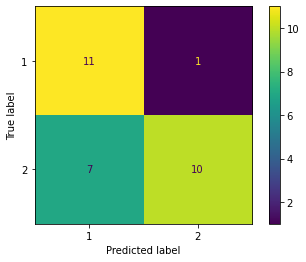

In [17]:
## Fitting a model with best parameters
model = GaussianNB(**GS.best_params_).fit(X_train, y_train)

## Compute prediction using test set
prediccion = model.predict(X_test)

## Display classification report
print(classification_report(y_pred=prediccion, y_true=y_test))

## Display confusion matrix
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test)
plt.show()